<a href="https://colab.research.google.com/github/utegenf/image_classification/blob/main/Algo_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d defileroff/comic-faces-paired-synthetic-v2
! unzip comic-faces-paired-synthetic-v2.zip

Streaming output truncated to the last 5000 lines.
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5503.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5504.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5505.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5506.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5507.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5508.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5509.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/551.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5510.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5511.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5512.jpg  
  in

In [173]:
!rm -rf face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/samples
!ls face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/

comics	faces


In [174]:
import os
# Directory with comics pictures
comics_dir = os.path.join('/content/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/comics')

# Directory with faces pictures
faces_dir = os.path.join('/content/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces')

In [175]:
train_comics_names = os.listdir(comics_dir)
print(train_comics_names[:5])

train_faces_names = os.listdir(faces_dir)
print(train_faces_names[:5])

['9468.jpg', '6588.jpg', '9477.jpg', '3426.jpg', '6343.jpg']
['9468.jpg', '6588.jpg', '9477.jpg', '3426.jpg', '6343.jpg']


Showing some comics pictures...



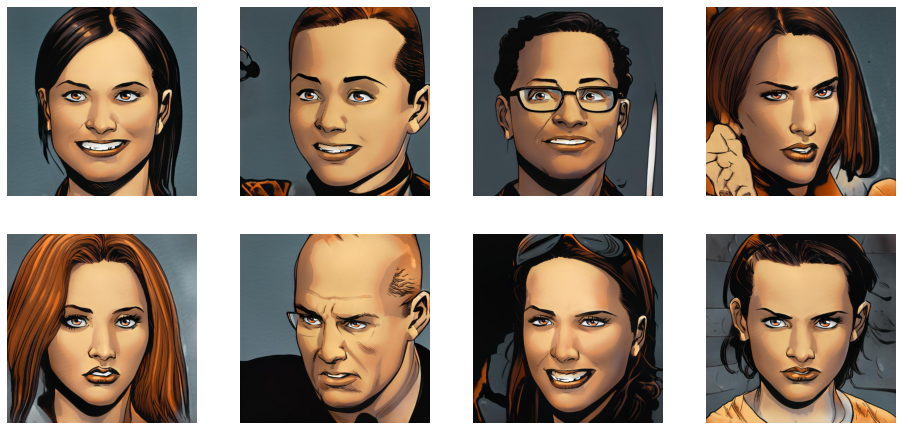

Showing some faces pictures...



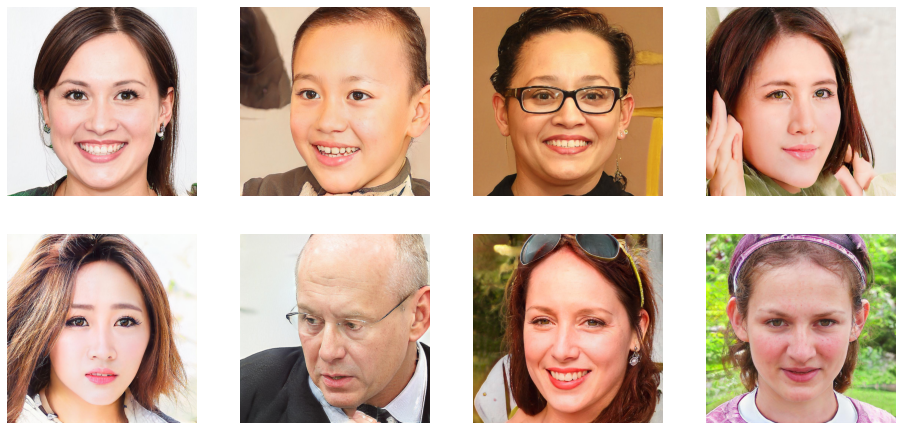

In [176]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_comics_pix = [os.path.join(comics_dir, fname) 
                for fname in train_comics_names[pic_index-8:pic_index]]
next_faces_pix = [os.path.join(faces_dir, fname) 
                for fname in train_faces_names[pic_index-8:pic_index]]

print ("Showing some comics pictures...")
print()
for i, img_path in enumerate(next_comics_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

print ("Showing some faces pictures...")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_faces_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [177]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 128
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['comics','faces'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 20000 images belonging to 2 classes.


In [178]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 2 output neurons for 2 classes with the softmax activation
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 23, 23, 64)      

In [179]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
total_sample=train_generator.n
n_epochs = 5
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/5
148/156 [===========================>..] - ETA: 49s - loss: 0.3318 - acc: 0.8857